In [16]:
import tensorflow as tf
from tensorflow import keras
import pathlib
import PIL
import numpy as np
import matplotlib.pyplot as plt

In [17]:
train_direction = pathlib.Path("./Segundo dataset/archive(1)/train")
#test_direction = pathlib.Path("/content/drive/MyDrive/Faculdade/TEIA (topicos es IA)/DataSet/test")

In [18]:
image_count = len(list(train_direction.glob('*/*.jpg')))
print("A quantidade de imagens de treino são de: ",image_count)

#image_count2 = len(list(test_direction.glob('*/*.jpg')))
#print("A quantidade de imagens de test são de: ",image_count2)

A quantidade de imagens de treino são de:  84635


In [19]:
img_height = 224
img_width = 224
batch_size = 32

In [20]:
dataset_treino = keras.utils.image_dataset_from_directory(
    train_direction,
    validation_split = 0.2,
    subset = "training",
    seed = 73,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 84635 files belonging to 525 classes.
Using 67708 files for training.


In [21]:
dataset_test = keras.utils.image_dataset_from_directory(
    train_direction,
    validation_split = 0.2,
    subset = "validation",
    seed = 73,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 84635 files belonging to 525 classes.
Using 16927 files for validation.


In [22]:
class_names = dataset_treino.class_names
print(class_names)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

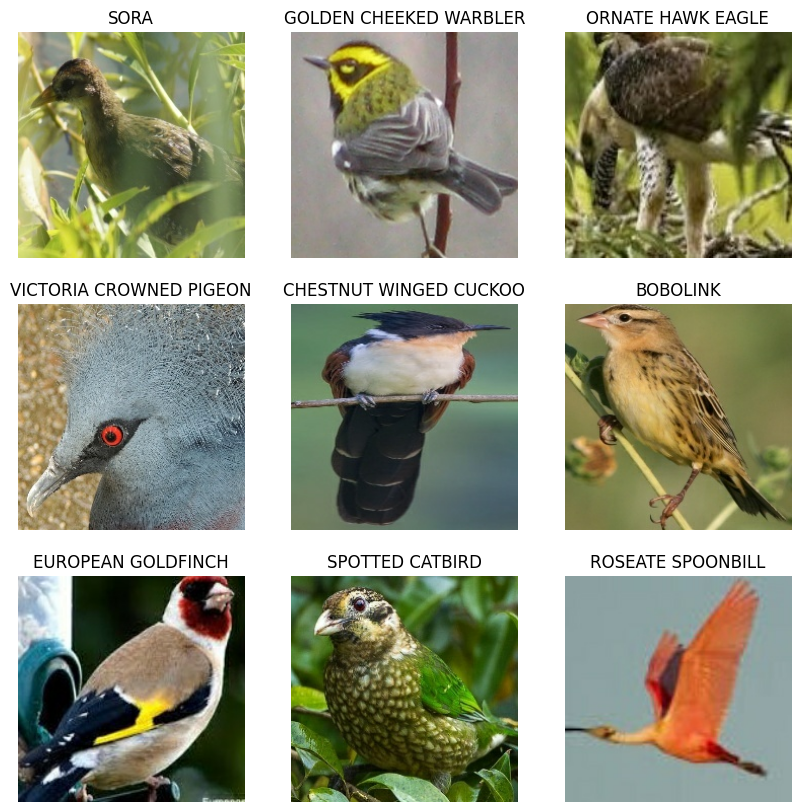

In [23]:
plt.figure(figsize = (10, 10))
for images, labels in dataset_treino.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i+1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

In [24]:
num_classes = len(class_names)

In [25]:
model = keras.models.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes, activation = 'softmax')
])

In [26]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)       

In [28]:
epochs = 8

history = model.fit(
    dataset_treino,
    validation_data = dataset_test,
    epochs = epochs
)

Epoch 1/8


2116/2116 [==============================] - 546s 258ms/step - loss: 5.1060 - accuracy: 0.0789 - val_loss: 3.9268 - val_accuracy: 0.2056
Epoch 2/8
2116/2116 [==============================] - 532s 251ms/step - loss: 3.2141 - accuracy: 0.3133 - val_loss: 3.1964 - val_accuracy: 0.3299
Epoch 3/8
2116/2116 [==============================] - 533s 252ms/step - loss: 2.3178 - accuracy: 0.4738 - val_loss: 3.0471 - val_accuracy: 0.3720
Epoch 4/8
2116/2116 [==============================] - 540s 255ms/step - loss: 1.6852 - accuracy: 0.5935 - val_loss: 3.3025 - val_accuracy: 0.3721
Epoch 5/8
2116/2116 [==============================] - 535s 253ms/step - loss: 1.2170 - accuracy: 0.6920 - val_loss: 3.8416 - val_accuracy: 0.3604
Epoch 6/8
2116/2116 [==============================] - 538s 254ms/step - loss: 0.8950 - accuracy: 0.7597 - val_loss: 4.2216 - val_accuracy: 0.3512
Epoch 7/8
2116/2116 [==============================] - 528s 250ms/step - loss: 0.6889 - accuracy: 0.8089 - val_loss: 4.7985 - va

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

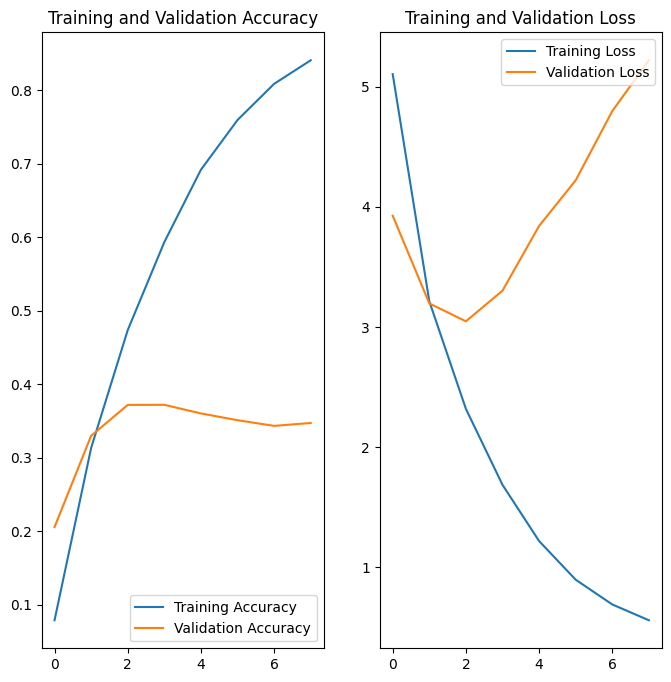

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()